In [1]:
import sys

In [2]:
sys.path

['C:\\Users\\AndrejxD\\OneDrive\\Sola\\MLG',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\python38.zip',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\DLLs',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\lib',
 'C:\\Users\\AndrejxD\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0',
 '',
 'C:\\Users\\AndrejxD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages',
 'd:\\downloads\\sketchgraphs',
 'C:\\Users\\AndrejxD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\win32',
 'C:\\Users\\AndrejxD\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\win3

315228
NodeOp(label=<EntityType.External: 7>, parameters={})
NodeOp(label=<EntityType.Line: 1>, parameters={'isConstruction': False, 'dirX': -1.0, 'dirY': 0.0, 'pntX': 3.7638401311776547e-20, 'pntY': 0.0010000000000000009, 'startParam': -0.023555728090000838, 'endParam': 0.023555728090000838})
NodeOp(label=<SubnodeType.SN_Start: 101>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(2, 1), parameters={})
NodeOp(label=<SubnodeType.SN_End: 102>, parameters={})
EdgeOp(label=<ConstraintType.Subnode: 101>, references=(3, 1), parameters={})
NodeOp(label=<EntityType.Line: 1>, parameters={'isConstruction': False, 'dirX': -1.0, 'dirY': 0.0, 'pntX': 0.0, 'pntY': -0.0009999999999999992, 'startParam': -0.023555728090000838, 'endParam': 0.023555728090000838})
EdgeOp(label=<ConstraintType.Parallel: 5>, references=(4, 1), parameters={})
EdgeOp(label=<ConstraintType.Horizontal: 4>, references=(4,), parameters={})
NodeOp(label=<SubnodeType.SN_Start: 101>, parameters={})
EdgeOp(lab

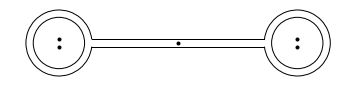

In [52]:
import sketchgraphs.data as datalib
import random
from sketchgraphs.data import flat_array
seq_data = flat_array.load_dictionary_flat('sg_t16_validation.npy')
print(len(seq_data['sequences']))

seq = seq_data['sequences'][random.randint(0, 315228)]
print(*seq[:20], sep='\n')
sketch = datalib.sketch_from_sequence(seq)
datalib.render_sketch(sketch);

In [11]:
import os
!dir

 Volume in drive C has no label.
 Volume Serial Number is A872-D3C5

 Directory of C:\Users\AndrejxD\OneDrive\Sola\MLG

02/05/2023  06:00 PM    <DIR>          .
02/05/2023  06:00 PM    <DIR>          ..
02/05/2023  05:33 PM             1,827 .gitignore
02/05/2023  05:32 PM    <DIR>          .ipynb_checkpoints
02/05/2023  06:00 PM             3,880 MLGSketchbook.ipynb
02/05/2023  05:26 PM                13 README.md
02/04/2023  08:53 PM       211,121,676 sg_t16_validation.npy
               4 File(s)    211,127,396 bytes
               3 Dir(s)  68,448,886,784 bytes free
